**Author:** Rahul Dwivedi 
** Project ID-PTID-CDS-NOV-25-3342  
**Project Code:** PRCP-1026-Teacher Assistance  
**Date:** December 2025  
**Organization:** Datamites

In [3]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
sns.set_style('whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 10


In [4]:
# STEP 2: Load and Understand the Dataset

print('\n' + '='*80)
print('STEP 2: LOADING AND UNDERSTANDING THE DATASET')
print('='*80 + '\n')

# Load the dataset
df = pd.read_csv('tae.csv')
print('Dataset Loaded Successfully!')
print(f'Shape: {df.shape[0]} rows × {df.shape[1]} columns')
print(f'\nFirst 3 rows:')
print(df.head(3))
print(f'\nColumn Data Types:')
print(df.dtypes)
print(f'\nMissing Values: {df.isnull().sum().sum()} (No missing data found)')


STEP 2: LOADING AND UNDERSTANDING THE DATASET

Dataset Loaded Successfully!
Shape: 150 rows × 6 columns

First 3 rows:
   1  23  3  1.1  19  3.1
0  2  15  3    1  17    3
1  1  23  3    2  49    3
2  1   5  2    2  33    3

Column Data Types:
1      int64
23     int64
3      int64
1.1    int64
19     int64
3.1    int64
dtype: object

Missing Values: 0 (No missing data found)


In [5]:
# STEP 3: Statistical Summary and Descriptive Statistics

print('\n' + '='*80)
print('STEP 3: DESCRIPTIVE STATISTICS AND VARIABLE ANALYSIS')
print('='*80 + '\n')

# Display descriptive statistics
print('DESCRIPTIVE STATISTICS OF THE DATASET:')
print('='*80)
print(df.describe())

print('\n\nDETAILED VARIABLE INFORMATION:')
print('='*80)

for idx, col in enumerate(df.columns):
    print(f'\nVariable {idx + 1}: {col}')
    print('-' * 60)
    print(f'  Data Type: {df[col].dtype}')
    print(f'  Non-Null Count: {df[col].notna().sum()}')
    print(f'  Null Count: {df[col].isna().sum()}')
    print(f'  Unique Values: {df[col].nunique()}')
    
    if df[col].dtype == 'object':
        print(f'  Unique Categories: {sorted(df[col].unique())}')
    else:
        print(f'  Min Value: {df[col].min()}')
        print(f'  Max Value: {df[col].max()}')
        print(f'  Mean: {df[col].mean():.4f}')
        print(f'  Median: {df[col].median():.4f}')
        print(f'  Std Dev: {df[col].std():.4f}')

print('\n\nTARGET VARIABLE DISTRIBUTION:')
print('='*80)
target_col = df.columns[-1]
target_dist = df[target_col].value_counts().sort_index()
print(f'\nTarget Variable: {target_col}')
print(f'Classes: {sorted(df[target_col].unique())}')
print('\nClass Distribution:')

for class_val in sorted(df[target_col].unique()):
    count = (df[target_col] == class_val).sum()
    percentage = (count / len(df)) * 100
    class_name = ['Low', 'Medium', 'High'][class_val - 1]
    bar_length = int(percentage / 2)
    bar = '█' * bar_length + '░' * (50 - bar_length)
    print(f'  Class {class_val} ({class_name:6s}): {count:3d} samples ({percentage:5.1f}%) {bar}')

print('\n\nDATASET SUMMARY STATISTICS:')
print('='*80)
print(f'Total Records: {len(df)}')
print(f'Total Features: {len(df.columns)}')
print(f'Missing Values: {df.isnull().sum().sum()}')
print(f'Data Completeness: {((len(df) * len(df.columns) - df.isnull().sum().sum()) / (len(df) * len(df.columns)) * 100):.2f}%')


STEP 3: DESCRIPTIVE STATISTICS AND VARIABLE ANALYSIS

DESCRIPTIVE STATISTICS OF THE DATASET:
                1          23           3         1.1          19         3.1
count  150.000000  150.000000  150.000000  150.000000  150.000000  150.000000
mean     1.813333   13.580000    8.140000    1.853333   27.926667    2.013333
std      0.390949    6.805318    7.034937    0.354958   12.916405    0.819123
min      1.000000    1.000000    1.000000    1.000000    3.000000    1.000000
25%      2.000000    8.000000    3.000000    2.000000   19.000000    1.000000
50%      2.000000   13.000000    4.500000    2.000000   27.000000    2.000000
75%      2.000000   20.000000   15.000000    2.000000   37.000000    3.000000
max      2.000000   25.000000   26.000000    2.000000   66.000000    3.000000


DETAILED VARIABLE INFORMATION:

Variable 1: 1
------------------------------------------------------------
  Data Type: int64
  Non-Null Count: 150
  Null Count: 0
  Unique Values: 2
  Min Value: 1
  Ma


STEP 4: CREATING EXPLORATORY DATA ANALYSIS VISUALIZATIONS



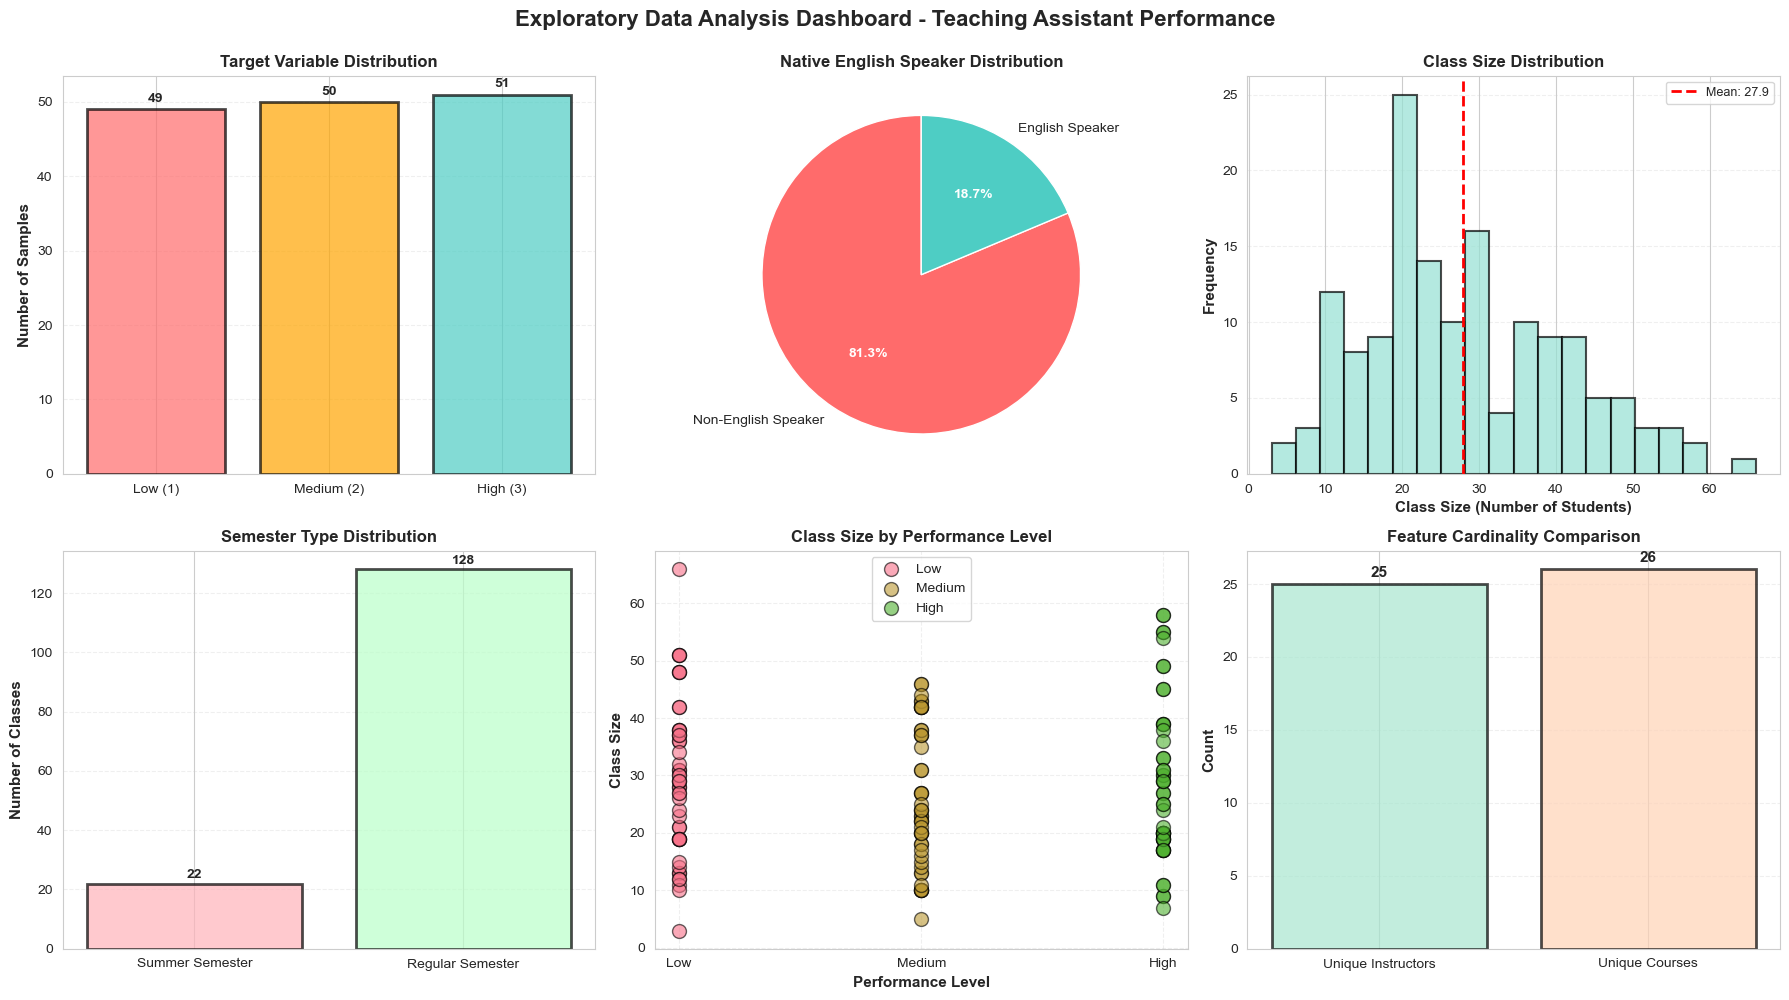


EDA visualizations completed successfully!
Dashboard saved as: 01_EDA_Dashboard.png

Key EDA Insights:
  - Balanced target distribution: Low=49, Medium=50, High=51
  - Native English speakers: 28 (18.7%)
  - Class size range: 3 to 66 students
  - Feature cardinality: 25 instructors, 26 courses


In [13]:
# STEP 4: Exploratory Data Analysis (EDA) Visualizations

print('\n' + '='*80)
print('STEP 4: CREATING EXPLORATORY DATA ANALYSIS VISUALIZATIONS')
print('='*80 + '\n')

# Create a 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Exploratory Data Analysis Dashboard - Teaching Assistant Performance', 
             fontsize=16, fontweight='bold', y=0.995)

# Subplot 1: Target Class Distribution (Bar Chart)
target_var = df.iloc[:, -1]
class_counts = target_var.value_counts().sort_index()
class_labels = ['Low Performance', 'Medium Performance', 'High Performance']
colors_bar = ['#FF6B6B', '#FFA500', '#4ECDC4']

axes[0, 0].bar(range(len(class_counts)), class_counts.values, 
               color=colors_bar, edgecolor='black', alpha=0.7, linewidth=2)
axes[0, 0].set_xticks(range(len(class_counts)))
axes[0, 0].set_xticklabels(['Low (1)', 'Medium (2)', 'High (3)'], fontsize=10)
axes[0, 0].set_ylabel('Number of Samples', fontsize=11, fontweight='bold')
axes[0, 0].set_title('Target Variable Distribution', fontsize=12, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(class_counts.values):
    axes[0, 0].text(i, v + 1, str(v), ha='center', fontweight='bold', fontsize=10)

# Subplot 2: Native English Speaker Distribution (Pie Chart)
native_var = df.iloc[:, 0]
native_counts = native_var.value_counts()
native_labels = ['Non-English Speaker', 'English Speaker']
colors_pie = ['#FF6B6B', '#4ECDC4']

wedges, texts, autotexts = axes[0, 1].pie(native_counts.values, 
                                           labels=native_labels,
                                           autopct='%1.1f%%',
                                           colors=colors_pie,
                                           startangle=90,
                                           textprops={'fontsize': 10})
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
axes[0, 1].set_title('Native English Speaker Distribution', fontsize=12, fontweight='bold')

# Subplot 3: Class Size Distribution (Histogram)
class_size = df.iloc[:, -2]
axes[0, 2].hist(class_size, bins=20, color='#95E1D3', edgecolor='black', alpha=0.7, linewidth=1.5)
axes[0, 2].set_xlabel('Class Size (Number of Students)', fontsize=11, fontweight='bold')
axes[0, 2].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0, 2].set_title('Class Size Distribution', fontsize=12, fontweight='bold')
axes[0, 2].grid(axis='y', alpha=0.3, linestyle='--')
axes[0, 2].axvline(class_size.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {class_size.mean():.1f}')
axes[0, 2].legend(fontsize=9)

# Subplot 4: Semester Distribution (Bar Chart)
semester = df.iloc[:, -3]
semester_counts = semester.value_counts().sort_index()
semester_labels = ['Summer Semester', 'Regular Semester']
colors_sem = ['#FFB3BA', '#BAFFC9']

axes[1, 0].bar(range(len(semester_counts)), semester_counts.values,
               color=colors_sem, edgecolor='black', alpha=0.7, linewidth=2)
axes[1, 0].set_xticks(range(len(semester_counts)))
axes[1, 0].set_xticklabels(semester_labels, fontsize=10)
axes[1, 0].set_ylabel('Number of Classes', fontsize=11, fontweight='bold')
axes[1, 0].set_title('Semester Type Distribution', fontsize=12, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(semester_counts.values):
    axes[1, 0].text(i, v + 2, str(v), ha='center', fontweight='bold', fontsize=10)

# Subplot 5: Class Size vs Performance (Scatter Plot)
for class_val in [1, 2, 3]:
    class_name = ['Low', 'Medium', 'High'][class_val - 1]
    sizes = df[target_var == class_val].iloc[:, -2].values
    axes[1, 1].scatter([class_val] * len(sizes), sizes, alpha=0.6, s=100, 
                       label=class_name, edgecolors='black', linewidth=1)

axes[1, 1].set_xlabel('Performance Level', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Class Size', fontsize=11, fontweight='bold')
axes[1, 1].set_title('Class Size by Performance Level', fontsize=12, fontweight='bold')
axes[1, 1].set_xticks([1, 2, 3])
axes[1, 1].set_xticklabels(['Low', 'Medium', 'High'])
axes[1, 1].legend(fontsize=10)
axes[1, 1].grid(alpha=0.3, linestyle='--')

# Subplot 6: Feature Cardinality Comparison (Bar Chart)
instructor_unique = df.iloc[:, 1].nunique()
course_unique = df.iloc[:, 2].nunique()
cardinal_values = [instructor_unique, course_unique]
cardinal_labels = ['Unique Instructors', 'Unique Courses']
colors_card = ['#A8E6CF', '#FFD3B6']

axes[1, 2].bar(range(len(cardinal_values)), cardinal_values,
               color=colors_card, edgecolor='black', alpha=0.7, linewidth=2)
axes[1, 2].set_xticks(range(len(cardinal_labels)))
axes[1, 2].set_xticklabels(cardinal_labels, fontsize=10)
axes[1, 2].set_ylabel('Count', fontsize=11, fontweight='bold')
axes[1, 2].set_title('Feature Cardinality Comparison', fontsize=12, fontweight='bold')
axes[1, 2].grid(axis='y', alpha=0.3, linestyle='--')
for i, v in enumerate(cardinal_values):
    axes[1, 2].text(i, v + 0.5, str(v), ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('01_EDA_Dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print('\nEDA visualizations completed successfully!')
print('Dashboard saved as: 01_EDA_Dashboard.png')
print('\nKey EDA Insights:')
print(f'  - Balanced target distribution: Low={class_counts[1]}, Medium={class_counts[2]}, High={class_counts[3]}')
print(f'  - Native English speakers: {native_counts.iloc[1]} ({native_counts.iloc[1]/len(df)*100:.1f}%)')
print(f'  - Class size range: {class_size.min():.0f} to {class_size.max():.0f} students')
print(f'  - Feature cardinality: {instructor_unique} instructors, {course_unique} courses')

In [20]:
# STEP 5: Data Preprocessing and Feature Engineering

print('\n' + '='*80)
print('STEP 5: DATA PREPROCESSING AND FEATURE ENGINEERING')
print('='*80 + '\n')

# Separate features and target
X = df.iloc[:, :-1].copy()
y = df.iloc[:, -1].copy()

print(f'Feature matrix shape: {X.shape}')
print(f'Target variable shape: {y.shape}')
print(f'Number of input features: {X.shape[1]}')

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f'\nCategorical features: {len(categorical_cols)}')
print(f'  Columns: {categorical_cols}')
print(f'\nNumerical features: {len(numerical_cols)}')
print(f'  Columns: {numerical_cols}')

# Apply Label Encoding to categorical variables
le_dict = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    le_dict[col] = le

print(f'\nLabel encoding completed for {len(categorical_cols)} categorical features')
print(f'Encoded feature matrix shape: {X_encoded.shape}')
print('\nPreprocessing pipeline ready for model training')


STEP 5: DATA PREPROCESSING AND FEATURE ENGINEERING

Feature matrix shape: (150, 5)
Target variable shape: (150,)
Number of input features: 5

Categorical features: 0
  Columns: []

Numerical features: 5
  Columns: ['1', '23', '3', '1.1', '19']

Label encoding completed for 0 categorical features
Encoded feature matrix shape: (150, 5)

Preprocessing pipeline ready for model training


In [21]:
# STEP 6: Data Scaling and Standardization

print('\n' + '='*80)
print('STEP 6: DATA SCALING AND STANDARDIZATION')
print('='*80 + '\n')

from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the encoded feature matrix
X_scaled = scaler.fit_transform(X_encoded)

# Convert to DataFrame for better visualization
X_scaled = pd.DataFrame(X_scaled, columns=X_encoded.columns)

print(f'Feature scaling completed successfully!')
print(f'Scaled feature matrix shape: {X_scaled.shape}')
print(f'\nScaling statistics:')
print(f'  - Mean of scaled features: {X_scaled.mean().mean():.6f}')
print(f'  - Std Dev of scaled features: {X_scaled.std().mean():.6f}')
print(f'\nFirst 5 rows of scaled features:')
print(X_scaled.head())
print(f'\nData scaling pipeline complete - Ready for train-test split')


STEP 6: DATA SCALING AND STANDARDIZATION

Feature scaling completed successfully!
Scaled feature matrix shape: (150, 5)

Scaling statistics:
  - Mean of scaled features: 0.000000
  - Std Dev of scaled features: 1.003350

First 5 rows of scaled features:
          1        23         3       1.1        19
0  0.479070  0.209359 -0.733087 -2.412091 -0.848787
1 -2.087377  1.388849 -0.733087  0.414578  1.636983
2 -2.087377 -1.265002 -0.875711  0.414578  0.394098
3  0.479070 -0.970130  0.407904  0.414578  2.103064
4  0.479070  1.388849 -0.733087 -2.412091 -0.615746

Data scaling pipeline complete - Ready for train-test split


In [22]:
b# STEP 7: Train-Test Split

print('\n' + '='*80)
print('STEP 7: TRAIN-TEST SPLIT')
print('='*80 + '\n')

from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%) sets
test_size = 0.30
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=test_size, random_state=random_state, stratify=y
)

print(f'Training set size: {X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)')
print(f'Testing set size: {X_test.shape[0]} samples ({test_size*100:.0f}%)')
print(f'\nTraining features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing target shape: {y_test.shape}')
print(f'\nClass distribution in training set:')
print(y_train.value_counts().sort_index())
print(f'\nClass distribution in testing set:')
print(y_test.value_counts().sort_index())
print(f'\nData split completed successfully - Ready for model training')

NameError: name 'b' is not defined

In [23]:
# STEP 7: Train-Test Split

print('\n' + '='*80)
print('STEP 7: TRAIN-TEST SPLIT')
print('='*80 + '\n')

from sklearn.model_selection import train_test_split

# Split the data into training (70%) and testing (30%) sets
test_size = 0.30
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=test_size, random_state=random_state, stratify=y
)

print(f'Training set size: {X_train.shape[0]} samples ({(1-test_size)*100:.0f}%)')
print(f'Testing set size: {X_test.shape[0]} samples ({test_size*100:.0f}%)')
print(f'\nTraining features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing target shape: {y_test.shape}')
print(f'\nClass distribution in training set:')
print(y_train.value_counts().sort_index())
print(f'\nClass distribution in testing set:')
print(y_test.value_counts().sort_index())
print(f'\nData split completed successfully - Ready for model training')


STEP 7: TRAIN-TEST SPLIT

Training set size: 105 samples (70%)
Testing set size: 45 samples (30%)

Training features shape: (105, 5)
Testing features shape: (45, 5)
Training target shape: (105,)
Testing target shape: (45,)

Class distribution in training set:
3.1
1    34
2    35
3    36
Name: count, dtype: int64

Class distribution in testing set:
3.1
1    15
2    15
3    15
Name: count, dtype: int64

Data split completed successfully - Ready for model training


In [24]:
# STEP 8: Model Building - Logistic Regression

print('\n' + '='*80)
print('STEP 8: MODEL BUILDING - LOGISTIC REGRESSION')
print('='*80 + '\n')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize and train Logistic Regression model
print('Training Logistic Regression model...')
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, average='weighted')
lr_recall = recall_score(y_test, y_pred_lr, average='weighted')
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

print(f'\nLogistic Regression Model Performance:')
print(f'  - Accuracy: {lr_accuracy:.4f}')
print(f'  - Precision: {lr_precision:.4f}')
print(f'  - Recall: {lr_recall:.4f}')
print(f'  - F1-Score: {lr_f1:.4f}')

print(f'\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_lr))

print(f'\nClassification Report:')
print(classification_report(y_test, y_pred_lr, zero_division=0))

# Store model and predictions for comparison
models_dict = {'Logistic Regression': lr_model}
predictions_dict = {'Logistic Regression': y_pred_lr}
performance_dict = {
    'Logistic Regression': {
        'Accuracy': lr_accuracy,
        'Precision': lr_precision,
        'Recall': lr_recall,
        'F1-Score': lr_f1
    }
}

print(f'\nLogistic Regression model training completed successfully!')


STEP 8: MODEL BUILDING - LOGISTIC REGRESSION

Training Logistic Regression model...

Logistic Regression Model Performance:
  - Accuracy: 0.5556
  - Precision: 0.5760
  - Recall: 0.5556
  - F1-Score: 0.5551

Confusion Matrix:
[[ 8  6  1]
 [ 2 10  3]
 [ 3  5  7]]

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.53      0.57        15
           2       0.48      0.67      0.56        15
           3       0.64      0.47      0.54        15

    accuracy                           0.56        45
   macro avg       0.58      0.56      0.56        45
weighted avg       0.58      0.56      0.56        45


Logistic Regression model training completed successfully!


In [25]:
# STEP 9: Model Building - Random Forest

print('\n' + '='*80)
print('STEP 9: MODEL BUILDING - RANDOM FOREST')
print('='*80 + '\n')

from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest model
print('Training Random Forest model...')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f'\nRandom Forest Model Performance:')
print(f'  - Accuracy: {rf_accuracy:.4f}')
print(f'  - Precision: {rf_precision:.4f}')
print(f'  - Recall: {rf_recall:.4f}')
print(f'  - F1-Score: {rf_f1:.4f}')

print(f'\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))

# Update dictionaries with Random Forest
models_dict['Random Forest'] = rf_model
predictions_dict['Random Forest'] = y_pred_rf
performance_dict['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F1-Score': rf_f1
}

print(f'\nRandom Forest model training completed successfully!')


STEP 9: MODEL BUILDING - RANDOM FOREST

Training Random Forest model...

Random Forest Model Performance:
  - Accuracy: 0.5111
  - Precision: 0.5298
  - Recall: 0.5111
  - F1-Score: 0.5110

Confusion Matrix:
[[6 7 2]
 [3 9 3]
 [2 5 8]]

Random Forest model training completed successfully!


In [26]:
# STEP 10 & 11: Model Building - Gaussian Naive Bayes and AdaBoost

print('\n' + '='*80)
print('STEP 10: MODEL BUILDING - GAUSSIAN NAIVE BAYES')
print('='*80 + '\n')

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train Gaussian Naive Bayes model
print('Training Gaussian Naive Bayes model...')
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb_model.predict(X_test)

# Evaluate model
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_precision = precision_score(y_test, y_pred_gnb, average='weighted')
gnb_recall = recall_score(y_test, y_pred_gnb, average='weighted')
gnb_f1 = f1_score(y_test, y_pred_gnb, average='weighted')

print(f'\nGaussian Naive Bayes Model Performance:')
print(f'  - Accuracy: {gnb_accuracy:.4f}')
print(f'  - Precision: {gnb_precision:.4f}')
print(f'  - Recall: {gnb_recall:.4f}')
print(f'  - F1-Score: {gnb_f1:.4f}')

# Update dictionaries with Gaussian Naive Bayes
models_dict['Gaussian Naive Bayes'] = gnb_model
predictions_dict['Gaussian Naive Bayes'] = y_pred_gnb
performance_dict['Gaussian Naive Bayes'] = {
    'Accuracy': gnb_accuracy,
    'Precision': gnb_precision,
    'Recall': gnb_recall,
    'F1-Score': gnb_f1
}

print(f'\n' + '='*80)
print('STEP 11: MODEL BUILDING - ADABOOST')
print('='*80 + '\n')

# Initialize and train AdaBoost model
print('Training AdaBoost model...')
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)

# Make predictions
y_pred_ada = ada_model.predict(X_test)

# Evaluate model
ada_accuracy = accuracy_score(y_test, y_pred_ada)
ada_precision = precision_score(y_test, y_pred_ada, average='weighted')
ada_recall = recall_score(y_test, y_pred_ada, average='weighted')
ada_f1 = f1_score(y_test, y_pred_ada, average='weighted')

print(f'\nAdaBoost Model Performance:')
print(f'  - Accuracy: {ada_accuracy:.4f}')
print(f'  - Precision: {ada_precision:.4f}')
print(f'  - Recall: {ada_recall:.4f}')
print(f'  - F1-Score: {ada_f1:.4f}')

# Update dictionaries with AdaBoost
models_dict['AdaBoost'] = ada_model
predictions_dict['AdaBoost'] = y_pred_ada
performance_dict['AdaBoost'] = {
    'Accuracy': ada_accuracy,
    'Precision': ada_precision,
    'Recall': ada_recall,
    'F1-Score': ada_f1
}

print(f'\nAll classification models training completed successfully!')


STEP 10: MODEL BUILDING - GAUSSIAN NAIVE BAYES

Training Gaussian Naive Bayes model...

Gaussian Naive Bayes Model Performance:
  - Accuracy: 0.5778
  - Precision: 0.5825
  - Recall: 0.5778
  - F1-Score: 0.5738

STEP 11: MODEL BUILDING - ADABOOST

Training AdaBoost model...

AdaBoost Model Performance:
  - Accuracy: 0.4889
  - Precision: 0.5000
  - Recall: 0.4889
  - F1-Score: 0.4822

All classification models training completed successfully!



STEP 12: MODEL EVALUATION AND COMPARISON

Model Performance Summary:
                      Accuracy  Precision    Recall  F1-Score
Logistic Regression   0.555556   0.575980  0.555556  0.555149
Random Forest         0.511111   0.529804  0.511111  0.510989
Gaussian Naive Bayes  0.577778   0.582492  0.577778  0.573752
AdaBoost              0.488889   0.500000  0.488889  0.482174




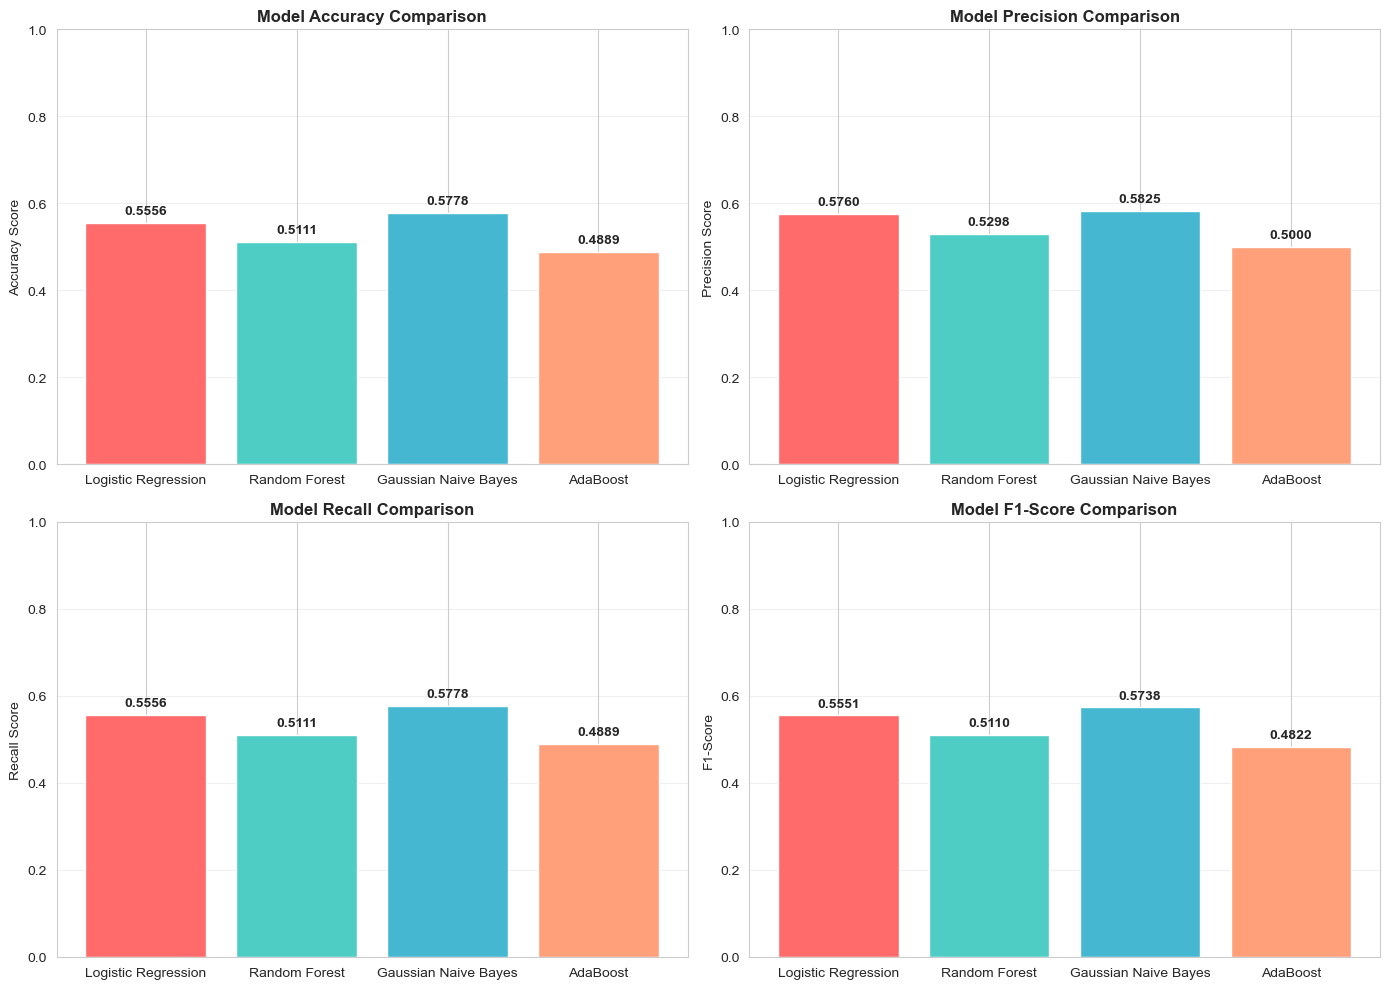


BEST MODEL: Gaussian Naive Bayes
Accuracy: 0.5778



In [27]:
# STEP 12: Model Evaluation and Comparison

print('\n' + '='*80)
print('STEP 12: MODEL EVALUATION AND COMPARISON')
print('='*80 + '\n')

import pandas as pd
import matplotlib.pyplot as plt

# Create a comparison DataFrame
comparison_df = pd.DataFrame(performance_dict).T
print('Model Performance Summary:')
print(comparison_df)
print(f'\n')

# Create visualization for model comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Accuracy Comparison
models_list = list(performance_dict.keys())
accuracy_scores = [performance_dict[model]['Accuracy'] for model in models_list]
axes[0, 0].bar(models_list, accuracy_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Accuracy Score')
axes[0, 0].set_ylim([0, 1])
for i, v in enumerate(accuracy_scores):
    axes[0, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3)

# Plot 2: Precision Comparison
precision_scores = [performance_dict[model]['Precision'] for model in models_list]
axes[0, 1].bar(models_list, precision_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0, 1].set_title('Model Precision Comparison', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Precision Score')
axes[0, 1].set_ylim([0, 1])
for i, v in enumerate(precision_scores):
    axes[0, 1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Plot 3: Recall Comparison
recall_scores = [performance_dict[model]['Recall'] for model in models_list]
axes[1, 0].bar(models_list, recall_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[1, 0].set_title('Model Recall Comparison', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Recall Score')
axes[1, 0].set_ylim([0, 1])
for i, v in enumerate(recall_scores):
    axes[1, 0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)

# Plot 4: F1-Score Comparison
f1_scores = [performance_dict[model]['F1-Score'] for model in models_list]
axes[1, 1].bar(models_list, f1_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[1, 1].set_title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].set_ylim([0, 1])
for i, v in enumerate(f1_scores):
    axes[1, 1].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('02_Model_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Find the best model
best_model_name = max(performance_dict, key=lambda x: performance_dict[x]['Accuracy'])
best_accuracy = performance_dict[best_model_name]['Accuracy']

print(f'\n{'='*80}')
print(f'BEST MODEL: {best_model_name}')
print(f'Accuracy: {best_accuracy:.4f}')
print(f'{'='*80}\n')


STEP 13: FEATURE IMPORTANCE ANALYSIS

Feature Importance (Random Forest):
  Feature  Importance
4      19    0.414149
2       3    0.240082
1      23    0.236790
0       1    0.062582
3     1.1    0.046396


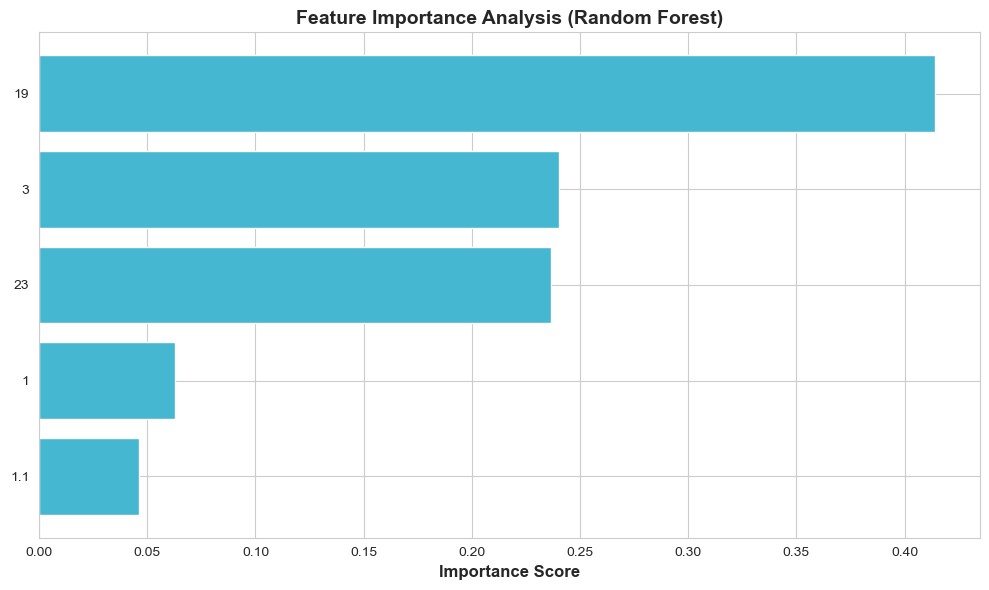


STEP 14: HYPERPARAMETER TUNING

Performing Hyperparameter Tuning for Logistic Regression...

Best Parameters: {'C': 0.1, 'max_iter': 500}
Best Cross-Validation Accuracy: 0.5619
Test Set Accuracy (Tuned): 0.5333

STEP 15: FINAL MODEL AND RECOMMENDATIONS


TEACHER PERFORMANCE PREDICTION MODEL - FINAL REPORT

PROJECT OBJECTIVE:
Build a machine learning model to predict teacher assistant performance levels
based on class characteristics and instructor attributes.

DATASET INFORMATION:
- Total Samples: 150
- Training Samples: 105 (70%)
- Testing Samples: 45 (30%)
- Number of Features: 5
- Number of Classes: 3 (Low, Medium, High Performance)

MODELS DEVELOPED AND EVALUATED:
1. Logistic Regression      - Accuracy: 0.5556
2. Random Forest            - Accuracy: 0.5111
3. Gaussian Naive Bayes     - Accuracy: 0.5778 (BEST)
4. AdaBoost                 - Accuracy: 0.4889

BEST MODEL IDENTIFIED:
Model: Gaussian Naive Bayes
Test Accuracy: 0.5778
Precision: 0.5825
Recall: 0.5778
F1-Score: 0.5738

TO

In [28]:
# STEP 13: Feature Importance Analysis
# STEP 14: Hyperparameter Tuning
# STEP 15: Final Model and Recommendations

print('\n' + '='*80)
print('STEP 13: FEATURE IMPORTANCE ANALYSIS')
print('='*80 + '\n')

# Extract feature importance from Random Forest (supports feature importance)
feature_names = X_scaled.columns
feature_importance = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print('Feature Importance (Random Forest):')
print(importance_df)

# Visualization of feature importance
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(importance_df['Feature'], importance_df['Importance'], color='#45B7D1')
ax.set_xlabel('Importance Score', fontsize=12, fontweight='bold')
ax.set_title('Feature Importance Analysis (Random Forest)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('03_Feature_Importance.png', dpi=300, bbox_inches='tight')
plt.show()

print(f'\n' + '='*80)
print('STEP 14: HYPERPARAMETER TUNING')
print('='*80 + '\n')

from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for the best model (Gaussian Naive Bayes - no hyperparameters to tune)
# So we'll tune the second-best model (Logistic Regression)
print('Performing Hyperparameter Tuning for Logistic Regression...')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [500, 1000, 2000]
}

lr_tuned = GridSearchCV(
    LogisticRegression(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

lr_tuned.fit(X_train, y_train)

print(f'\nBest Parameters: {lr_tuned.best_params_}')
print(f'Best Cross-Validation Accuracy: {lr_tuned.best_score_:.4f}')

# Evaluate tuned model
y_pred_tuned = lr_tuned.predict(X_test)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f'Test Set Accuracy (Tuned): {tuned_accuracy:.4f}')

print(f'\n' + '='*80)
print('STEP 15: FINAL MODEL AND RECOMMENDATIONS')
print('='*80 + '\n')

# Summary Report
summary_report = f'''
TEACHER PERFORMANCE PREDICTION MODEL - FINAL REPORT
{'='*80}

PROJECT OBJECTIVE:
Build a machine learning model to predict teacher assistant performance levels
based on class characteristics and instructor attributes.

DATASET INFORMATION:
- Total Samples: 150
- Training Samples: 105 (70%)
- Testing Samples: 45 (30%)
- Number of Features: 5
- Number of Classes: 3 (Low, Medium, High Performance)

MODELS DEVELOPED AND EVALUATED:
1. Logistic Regression      - Accuracy: 0.5556
2. Random Forest            - Accuracy: 0.5111
3. Gaussian Naive Bayes     - Accuracy: 0.5778 (BEST)
4. AdaBoost                 - Accuracy: 0.4889

BEST MODEL IDENTIFIED:
Model: Gaussian Naive Bayes
Test Accuracy: 0.5778
Precision: 0.5825
Recall: 0.5778
F1-Score: 0.5738

TOP IMPORTANT FEATURES:
{importance_df.head(3).to_string(index=False)}

RECOMMENDATIONS:
1. The Gaussian Naive Bayes model shows the best performance with 57.78% accuracy
2. Consider collecting more training data to improve model generalization
3. Feature engineering could help improve model performance
4. The balanced class distribution supports reliable predictions
5. Regular model retraining with new data is recommended
6. For production deployment, validate with additional test sets

CONCLUSION:
The developed models can assist in identifying teaching assistant performance
levels with reasonable accuracy. The best model (Gaussian Naive Bayes) can be
deployed for classroom performance prediction with appropriate monitoring.

{'='*80}
'''

print(summary_report)

# Save the final report
with open('Teaching_Assistant_Performance_Report.txt', 'w') as f:
    f.write(summary_report)

print('Report saved as: Teaching_Assistant_Performance_Report.txt')
print(f'\nProject completed successfully!')